<a href="https://colab.research.google.com/github/smperez1997/PRY_MachineLearning/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

In [ ]:
import pandas as pd
import geopandas as geopd
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.cluster import KMeans

# **Representación de datos covid-19 Global**

---



In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
table_covid = pd.read_csv('/content/drive/MyDrive/Covid-IA/confirmados-global.csv')
table_deads_covid = pd.read_csv('/content/drive/MyDrive/Covid-IA/muertos-covid-global.csv')
table_recovered_covid = pd.read_csv('/content/drive/MyDrive/Covid-IA/recuperados-covid-global.csv')
exportable_table_covid19 = pd.DataFrame()
exportable_table_covid19.insert(0, "date",table_covid.columns[4:], True) 


In [ ]:
#Información estadistica confirmados
table_covid.describe()

In [ ]:
table_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644


Con el dataset de personas contagiadas-muertas-recuperadas por covid-19, se procede a limpiarlo y obtener los datos para graficar una linea de tiempo y realizar una comparativa para encontrar posibles relaciones

In [ ]:
#Linea de tiempo de casos confirmados Global 
total = table_covid.sum(axis=0)
total_dates_confirmed = total[3:]
data_graph = total_dates_confirmed
total_dates_confirmed = total_dates_confirmed.reset_index()
total_dates_confirmed = total_dates_confirmed.drop(['index'], axis=1)
exportable_table_covid19.insert(1, "confirmed",total_dates_confirmed, False) 
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [130,5]
plt.plot(data_graph,marker='o', markerfacecolor='blue', markersize=4, color='g', linewidth=3, label ='No. Casos')
plt.title('Linea de Tiempo Casos Confirmados Global Covid-19')
plt.xlabel('Fechas')
plt.ylabel('Numero de Casos confirmados')
plt.legend()

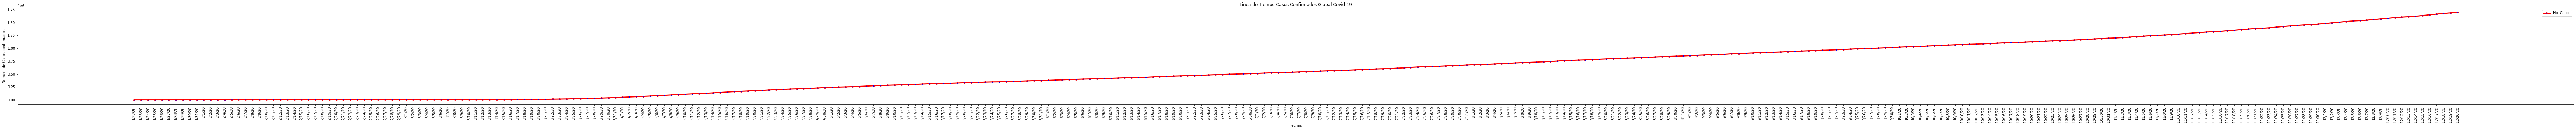

In [ ]:
#Linea de tiempo de muertes por covid-19 Global
total = table_deads_covid.sum(axis=0)
total_dates_dead = total[3:]
data_graph = total_dates_dead
total_dates_dead = total_dates_dead.reset_index()
total_dates_dead = total_dates_dead.drop(['index'], axis=1)
exportable_table_covid19.insert(1, "dead",total_dates_dead, False) 
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [130,5]
plt.plot(data_graph,marker='o', markerfacecolor='blue', markersize=4, color='r', linewidth=3, label ='No. Casos')
plt.title('Linea de Tiempo Casos Confirmados Global Covid-19')
plt.xlabel('Fechas')
plt.ylabel('Numero de Casos confirmados')
plt.legend()

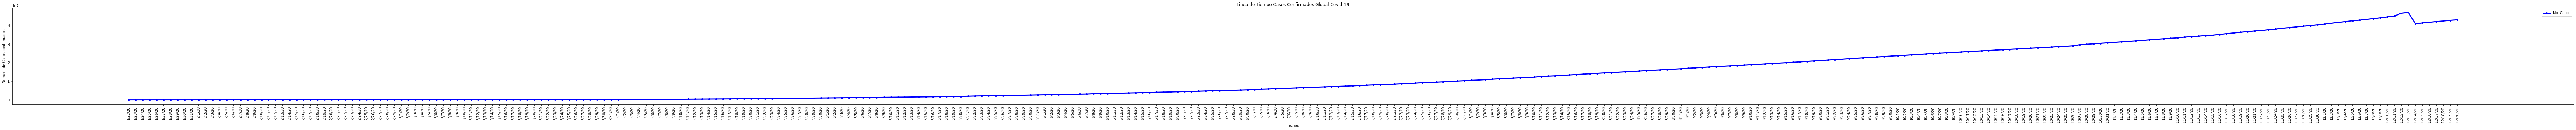

In [ ]:
#Linea de tiempo de recuperados de covid-19 global
total = table_recovered_covid.sum(axis=0)
total_dates_recovered = total[3:]
data_graph = total_dates_recovered
total_dates_recovered = total_dates_recovered.reset_index()
total_dates_recovered = total_dates_recovered.drop(['index'], axis=1)
exportable_table_covid19.insert(1, "recovered",total_dates_recovered, False)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [130,5]
plt.plot(data_graph,marker='o', markerfacecolor='blue', markersize=4, color='b', linewidth=3, label ='No. Casos')
plt.title('Linea de Tiempo Casos Confirmados Global Covid-19')
plt.xlabel('Fechas')
plt.ylabel('Numero de Casos confirmados')
plt.legend()

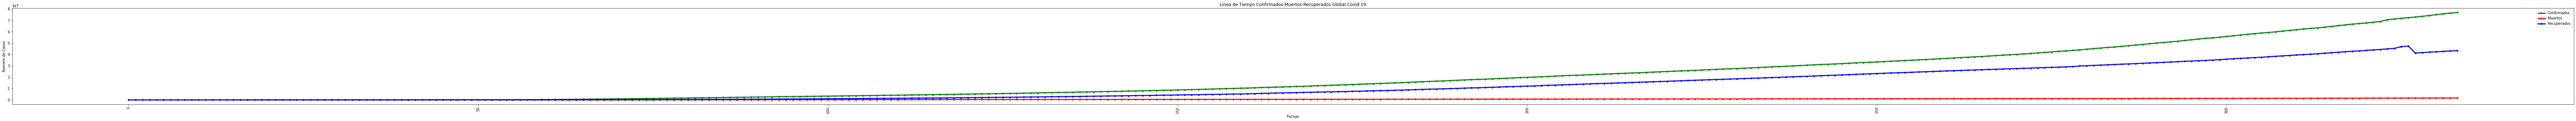

In [ ]:
#Confirmados-Muertos-Recuperados
plt.plot(total_dates_confirmed,marker='o', markerfacecolor='green', markersize=4, color='g', linewidth=3, label ='Confirmados')
plt.plot(total_dates_dead,marker='o', markerfacecolor='red', markersize=4, color='r', linewidth=3, label ='Muertos')
plt.plot(total_dates_recovered,marker='o', markerfacecolor='blue', markersize=4, color='b', linewidth=3, label ='Recuperados')
plt.xticks(rotation=90)
plt.title('Linea de Tiempo Confirmados-Muertos-Recuperados Global Covid-19')
plt.xlabel('Fechas')
plt.ylabel('Numero de Casos')
plt.legend()
plt.show()


**Podemos observar que**
*   El numero de personas contagiadas es muy alta y tiende a creser mucho mas
*  Se puede ver una pequeña relacion entre el numero de personas recuperadas y muertas, mientras el numero de personas recuperadas crese el numero de personas muertas decrese lo que nos da a enter que los tratamientos cada vez son mas efectivos.



**Exportar datos a Excel**

In [ ]:
exportable_table_covid19.to_excel('global-covid-data.xlsx')
exportable_table_covid19

,date,recovered,dead,confirmed
0,1/22/20,28,17,555
1,1/23/20,30,18,654
2,1/24/20,36,26,941
3,1/25/20,39,42,1434
4,1/26/20,52,56,2118
...,...,...,...,...
329,12/16/20,41977327,1648956,74219546
330,12/17/20,42349997,1662202,74955161
331,12/18/20,42667969,1674840,75672814
332,12/19/20,43023052,1685526,76289042


# **Representación de datos Covid-19 Estados Unidos**

---



Vamos a analizar los datasets de Estados Unidos pero investigaremos in poco mas profundo de lo normal, vamos a ver los datos en un grafico de barras agrupados por estados y visualizaremos que estado tiene mas contagios

In [ ]:
#obtenemos los datasets necesarios y generamos nuesto dataframe para el analisis
confirmed_usa_data = pd.read_csv('/content/drive/MyDrive/Covid-IA/confirmados-usa.csv')
dead_usa_data = pd.read_csv('/content/drive/MyDrive/Covid-IA/dead-usa.csv')

confirmed_usa_data.rename(columns = {'Admin2':'condado', '12/20/20':'contagiados'}, inplace = True)
confirmed_usa_data = confirmed_usa_data[['FIPS','condado','contagiados']]

dead_usa_data.rename(columns = {'Admin2':'condado', '12/20/20':'contagiados'}, inplace = True)
dead_usa_data = dead_usa_data[['FIPS','condado','contagiados']]

usa_confirmed_died_actual = confirmed_usa_data
usa_confirmed_died_actual['muertos'] = dead_usa_data['contagiados']

usa_confirmed_died_actual = usa_confirmed_died_actual.sort_values('contagiados',ascending=False)
usa_confirmed_died_actual = usa_confirmed_died_actual[0:9]


In [ ]:


##fig = px.bar(confirmed_usa_data[0:9], x='condado', y='contagiados', title='Contagiados usa')

fig = go.Figure(data=[
    go.Bar(name='Contagiados', x= usa_confirmed_died_actual['condado'], y=usa_confirmed_died_actual['contagiados']),
    go.Bar(name='Muertos', x=usa_confirmed_died_actual['condado'], y= usa_confirmed_died_actual['muertos'])
])
fig.update_layout(barmode='group', title='Casos confirmados vs Muertes en Usa')
fig.show()

**Podemos observar que**


*   El numero de muertes es bastante inferior que el de infectados
*   El numero de personas que se recuperan es muy alto



# **Representación de datos covid-19 Global MAPAS**

In [ ]:
#Obtenemos y limpiamos nuestro geo-dataset
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))

world_confirmed_data = world.merge(table_covid, how='left', left_on=['name'], right_on= ['Country/Region'])

world_confirmed_data.dropna(subset=['Country/Region'])


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,Fiji,-17.713400,178.065000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,38.0,38.0,38.0,38.0,38.0,38.0,42.0,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,Tanzania,-6.369028,34.888822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0,509.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Alberta,Canada,53.933300,-116.576500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35545.0,36405.0,37312.0,38338.0,39329.0,40189.0,40962.0,41692.0,42797.0,43952.0,45288.0,46872.0,48421.0,49536.0,50801.0,51878.0,53105.0,54836.0,56444.0,58177.0,59484.0,61169.0,63023.0,64851.0,66730.0,68566.0,70301.0,72028.0,73488.0,75054.0,76792.0,78382.0,80099.0,81986.0,83327.0,84597.0,86168.0,87581.0,88933.0,90219.0
4,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",British Columbia,Canada,53.726700,-127.647600,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,19239.0,20369.0,20986.0,20986.0,20986.0,22945.0,23662.0,24422.0,24960.0,25474.0,25474.0,25474.0,27407.0,28348.0,29086.0,29973.0,30884.0,30884.0,30884.0,33238.0,33894.0,34728.0,35422.0,36132.0,36132.0,36132.0,38152.0,38718.0,39337.0,40060.0,40797.0,40797.0,40797.0,42943.0,43463.0,44103.0,44776.0,45400.0,45400.0,45400.0
5,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Diamond Princess,Canada,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",NaN,Rwanda,-1.940300,29.873900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5312.0,5319.0,5362.0,5394.0,5455.0,5491.0,5507.0,5543.0,5572.0,5586.0,5620.0,5665.0,5726.0,5750.0,5779.0,5851.0,5872.0,5891.0,5919.0,5934.0,5948.0,5994.0,6011.0,6043.0,6084.0,6129.0,6191.0,6237.0,6278.0,6349.0,6428.0,6528.0,6659.0

In [ ]:
#Casos confirmados Covid-19 Global
map_global = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=world_confirmed_data,
    data=world_confirmed_data,
    name='Casos Confirmados',
    columns=['iso_a3','12/20/20'],
    key_on='feature.properties.iso_a3',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    nan_fill_color='white',
    legend_name='Casos confirmados Covid-19',
).add_to(map_global)
folium.LayerControl().add_to(map_global)
map_global

**Podemos Observar que**


*   Los paices mas afectados son Brasil  y la india
*   En la mayoria de los paices el numero de contagiados esta entre la media



# **Representación de datos Covid-19 Usa**

---



In [ ]:
#Casos confirmados Covid-19 USA

county_geo = f'{url}/us_counties_20m_topo.json'
usa_table = pd.read_csv('/content/drive/MyDrive/Covid-IA/confirmados-usa.csv')
usa_county_geo = geopd.read_file(county_geo)

usa_data = usa_table.get(['FIPS','12/20/20'])

for index,row in usa_county_geo.iterrows():
  usa_county_geo.get('id')[index] = float(row['id'][-5:])

data_mix = usa_county_geo.merge(usa_data, how='left', left_on=['id'], right_on= ['FIPS'])

data_mix.crs = "EPSG:4326"
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=data_mix,
    name='Confirmados usa',
     key_on='feature.properties.FIPS',
    data=data_mix,
    columns=['FIPS', '12/20/20'],
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='white',
    legend_name='Confirmados Usa Covd-19'
).add_to(m)
folium.LayerControl().add_to(m)
display(m)


# **Focos de Infeccion Covid-19 Global**

---

Con el metodo K-means agruparemos los paices en focos de infeccion para determinar cuales son los lugares mas infecciosos.

In [ ]:
#Normalizamos el dataset
usa_infeccion_data = usa_confirmed_died_actual.iloc[:,1:]
mm_scaler = preprocessing.MinMaxScaler()
usa_infeccion_data_mm = mm_scaler.fit_transform(usa_infeccion_data)
usa_infeccion_data_mm = pd.DataFrame(df_mm, columns=usa_infeccion_data.columns)
usa_infeccion_data_mm

,contagiados,muertos
0,1.000000,1.000000
1,0.470441,0.847509
2,0.279227,0.444754
3,0.267134,0.362878
4,0.152132,0.253710
5,0.054559,0.066773
6,0.027633,0.000000
7,0.015196,0.110625
8,0.000000,0.055246


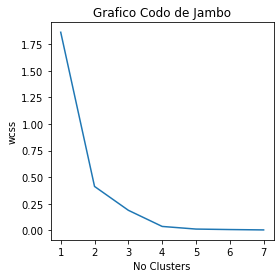

In [ ]:
#buscamos la cantidad optima de cliusters
wcss = []

for i in range(1,8):
  modelo_focos_infeccion = KMeans(n_clusters = i, max_iter=300)
  modelo_focos_infeccion.fit(usa_infeccion_data_mm)
  wcss.append(modelo_focos_infeccion.inertia_)

plt.plot(range(1,8),wcss)
plt.title('Grafico Codo de Jambo')
plt.xlabel('No Clusters')
plt.ylabel('wcss')
plt.rcParams["figure.figsize"] = [4,4]
plt.show()

In [ ]:
#aplicamos kMeans a nustro dataset y lo indexamos
modelo_focos_infeccion = KMeans(n_clusters = 4, max_iter=300)
modelo_focos_infeccion.fit(usa_infeccion_data_mm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

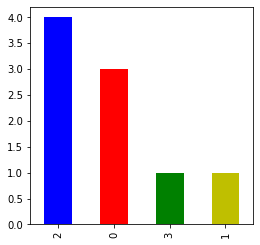

In [ ]:
usa_confirmed_died_actual['foco'] = modelo_focos_infeccion.labels_
usa_confirmed_died_actual.foco.value_counts().plot(kind = 'bar', color = ['b', 'r','g','y'])

In [ ]:
#Focos de infeccion Covid-19 USA 

county_geo = f'{url}/us_counties_20m_topo.json'
usa_county_geo = geopd.read_file(county_geo)

usa_confirmed_died_actual

,FIPS,condado,contagiados,muertos,foco
213,6037.0,Los Angeles,623670,8875,1
640,17031.0,Cook,371088,7724,3
108,4013.0,Maricopa,279885,4684,0
382,12086.0,Miami-Dade,274117,4066,0
2798,48201.0,Harris,219265,3242,0
2754,48113.0,Dallas,172726,1831,2
231,6071.0,San Bernardino,159883,1327,2
1813,32003.0,Clark,153951,2162,2
228,6065.0,Riverside,146703,1744,2


In [ ]:
import branca
import json
import requests
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
county_geo = f"{url}/us_counties_20m_topo.json"

series = usa_confirmed_died_actual.set_index('FIPS')['foco']

def getColor(condado):
  if condado == 0:
    return '#1922FB'
  elif condado == 1:
    return '#FF2905'
  elif condado == 2:
    return '#008013'
  elif condado == 3:
    return '#BFBF23'
      
def style_function(feature):
    condado = series.get(float(feature["id"][-5:]), None)
    
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "#black" if condado is None else getColor(condado),
    }


m = folium.Map(location=[48, -102], tiles="cartodbpositron", zoom_start=3)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    "objects.us_counties_20m",
    style_function=style_function,
).add_to(m)


m  
